In [125]:
# import nltk
# nltk.download("punkt")

In [1]:
import datetime as dt
from datetime import datetime
import pandas as pd
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader  import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import os
import yfinance as yf
import plotly.graph_objects as go
import numpy as np

In [2]:
datafile = "research_dataset/archive/"

all_subreddit = os.listdir(datafile)

In [135]:
wsb = "wallstreetbets/"
dataset_name = "submissions_reddit.csv"
df = pd.read_csv(datafile + wsb + dataset_name)


,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,...,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
0,ko124i,[deleted],2021-01-01 00:02:06,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,...,Gain,1.00,34,0,1,14,0,[deleted],default,https://redd.it/ko124i
1,ko12uq,[deleted],2021-01-01 00:03:20,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,...,Gain,1.00,2,0,0,0,0,[deleted],default,https://redd.it/ko12uq
2,ko13df,[deleted],2021-01-01 00:04:11,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,...,Meme,0.88,13,0,0,7,0,[deleted],default,https://redd.it/ko13df
3,ko17yf,shirotimatim,2021-01-01 00:11:51,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,0,0,...,News,0.92,183,0,0,26,0,NaN,https://b.thumbs.redditmedia.com/LmWdNB0W1qHT0...,https://redd.it/ko17yf
4,ko1a4i,WSBVoteBot,2021-01-01 00:15:38,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,0,0,...,None,0.50,0,0,0,19,0,Every time a new submission is posted to walls...,self,https://redd.it/ko1a4i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775321,rt6e7q,[deleted],2021-12-31 23:44:10,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,Discussion,1.00,1,0,0,1,0,[removed],default,https://redd.it/rt6e7q
775322,rt6frk,Hychro617,2021-12-31 23:46:35,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,YOLO,1.00,1,0,0,1,0,[removed],self,https://redd.it/rt6frk
775323,rt6kgr,Lambaline,2021-12-31 23:53:41,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,Loss,1.00,2,0,0,3,0,NaN,https://b.thumbs.redditmedia.com/TtUVXN1XpoXXu...,https://redd.it/rt6kgr
775324,rt6kvg,[deleted],2021-12-31 23:54:17,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,1,...,Discussion,1.00,1,0,0,1,0,[deleted],default,https://redd.it/rt6kvg


In [137]:
df = df.dropna(subset="title")

In [138]:
for col in df: 
    unique = (df[col].unique())
    print(col)
    print(len(unique))
    print(unique[:5])

id
775323
['ko124i' 'ko12uq' 'ko13df' 'ko17yf' 'ko1a4i']
author
373849
['[deleted]' 'shirotimatim' 'WSBVoteBot' 'dluther93' 'iOinkedU']
created
637098
['2021-01-01 00:02:06' '2021-01-01 00:03:20' '2021-01-01 00:04:11'
 '2021-01-01 00:11:51' '2021-01-01 00:15:38']
retrieved
25815
['2021-02-02 21:52:13' '2021-02-02 21:52:14' '2021-02-02 21:52:15'
 '2021-02-02 21:52:16' '2021-02-02 21:52:18']
edited
20617
['1970-01-01 00:00:00' '2021-01-01 03:50:40' '2021-01-01 16:59:32'
 '2021-01-01 02:08:00' '2021-01-01 02:27:41']
pinned
1
[0]
archived
1
[0]
locked
2
[0 1]
removed
2
[1 0]
deleted
2
[1 0]
is_self
2
[1 0]
is_video
2
[0 1]
is_original_content
2
[0 1]
title
694825
['3k - 170k since March (Also, buy LIT!!)'
 'Got out of PLTR calls after learning about IV (thanks to wsb) and went into TSLA/FUTU calls. Ending 2020 with a small profit. Wishing everyone more tendies going into 2021 and a happy new year fam.'
 'Hell of a headline'
 'Top popular stocks on WSB too! Also, why they didn’t give my boy

In [139]:
df.columns

Index(['id', 'author', 'created', 'retrieved', 'edited', 'pinned', 'archived',
       'locked', 'removed', 'deleted', 'is_self', 'is_video',
       'is_original_content', 'title', 'link_flair_text', 'upvote_ratio',
       'score', 'gilded', 'total_awards_received', 'num_comments',
       'num_crossposts', 'selftext', 'thumbnail', 'shortlink'],
      dtype='object')

In [140]:
df["created_date"] = df["created"].apply(lambda x: x[:10])

C:\Users\thwal\AppData\Local\Temp\ipykernel_27304\3917986661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["created_date"] = df["created"].apply(lambda x: x[:10])


In [141]:
num_post = df.groupby(["created_date"])[["id"]].count().rename(columns = {"id":"Post Count"})
num_post.index =  pd.to_datetime(num_post.index)

In [142]:
stock_data = yf.download("SPY GME ", start = "2021-1-1", end="2021-12-31",group_by="ticker")

[*********************100%***********************]  2 of 2 completed


In [143]:
stock_data["GME"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,19.250000,19.799999,18.799999,18.840000,18.840000,6922700
2021-01-04,19.000000,19.100000,17.150000,17.250000,17.250000,10022500
2021-01-05,17.350000,18.080000,17.230000,17.370001,17.370001,4961500
2021-01-06,17.340000,18.980000,17.330000,18.360001,18.360001,6056200
2021-01-07,18.469999,19.450001,18.020000,18.080000,18.080000,6129300
...,...,...,...,...,...,...
2021-12-23,154.000000,155.000000,146.020004,152.139999,152.139999,1055500
2021-12-27,152.000000,152.619995,140.000000,148.309998,148.309998,1613600
2021-12-28,147.500000,157.410004,146.410004,146.460007,146.460007,1331100


In [144]:
post_and_gme = pd.concat([num_post, stock_data["GME"]["Adj Close"]],axis=1)#.rename(columns={"Volume": "Adj Close"})

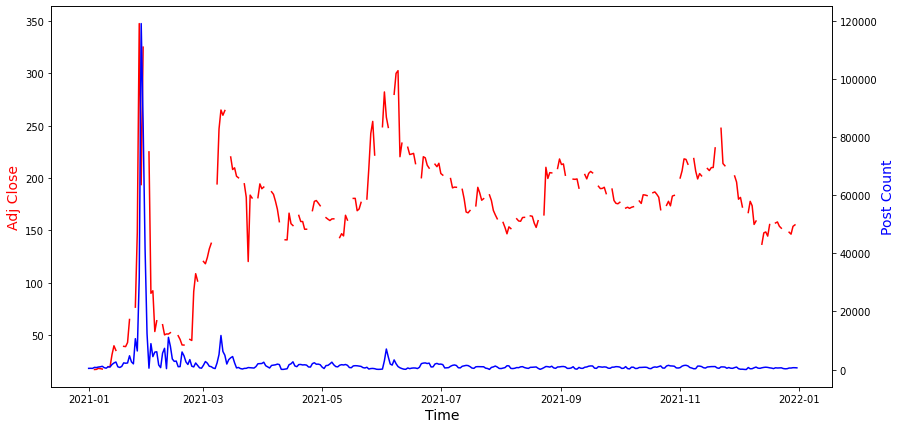

In [145]:
def plot_line(df, col1, col2):
    fig,ax = plt.subplots()
    fig.set_size_inches((14,7))
    # make a plot
    ax.plot(post_and_gme.index, post_and_gme[col1], color="red")
    # set x-axis label
    ax.set_xlabel("Time",fontsize=14)
    # set y-axis label
    ax.set_ylabel(col1,color="red",fontsize=14)
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(post_and_gme.index, post_and_gme[col2],color="blue")
    ax2.set_ylabel(col2,color="blue",fontsize=14)

#     plt.show()
    # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#                 dpi=100,
#                 bbox_inches='tight')
    return fig
plot_line(post_and_gme, "Adj Close", "Post Count");

In [146]:
post_and_gme['GME_pct_change'] = post_and_gme["Adj Close"].pct_change()
post_and_gme['GME_log_return'] = np.log(1 + post_and_gme.GME_pct_change)
post_and_gme['post_pct_change'] = post_and_gme["Post Count"].pct_change()
post_and_gme['post_log_return'] = np.log(1 + post_and_gme.post_pct_change)

In [147]:
post_and_gme['log_GME'] = np.log(post_and_gme["Adj Close"])
post_and_gme['log_post'] = np.log(post_and_gme["Post Count"])
post_and_gme['abs_GME_log_return'] = abs(post_and_gme['GME_log_return'])
post_and_gme['abs_post_log_return'] = abs(post_and_gme['post_log_return'])

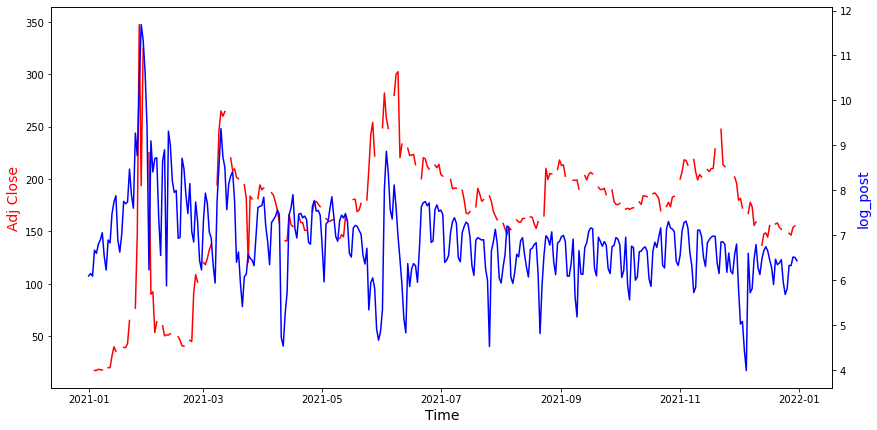

In [148]:
plot_line(post_and_gme, "Adj Close", "log_post");

In [149]:
col1 = "abs_post_log_return"
col2 = "GME_pct_change"

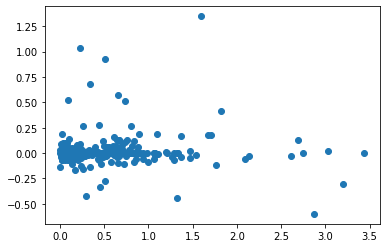

In [150]:
plt.scatter(post_and_gme[col1], post_and_gme[col2])

In [151]:
(post_and_gme[col1]).corr(post_and_gme[col2])

0.010455532531006773

### Check semtiment

In [152]:
for index, row in df[["title"]].iterrows():
    try:
        word_tokenize(row["title"])
    except Exception as e:
        print(e)
        print(row["title"])
        print(index)
        